data https://www.kaggle.com/datasets/ppb00x/credit-risk-customers?resource=download

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)
sns.set(font_scale=1.15)
sns.set_style("whitegrid")

In [82]:
df = pd.read_csv('credit_customers.csv' )
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


EDA

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [84]:
df.isnull().sum()

checking_status    0
duration           0
credit_history     0
purpose            0
credit_amount      0
                  ..
job                0
num_dependents     0
own_telephone      0
foreign_worker     0
class              0
Length: 21, dtype: int64

In [85]:
df1 = df.copy()
df1['class'] = np.where(df1['class'] == 'bad' , 1 , 0)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [86]:
df1[['sex', 'marriage']] = df1['personal_status'].str.split(" ", n = 1 , expand = True)
df1.drop(['personal_status'], axis=1, inplace = True)
df1.drop(['num_dependents'] , axis = 1 , inplace = True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_12028\3203983165.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['bin_'+i] = pd.qcut(df_group[i].astype(float), q=5, duplicates='drop', precision=0)


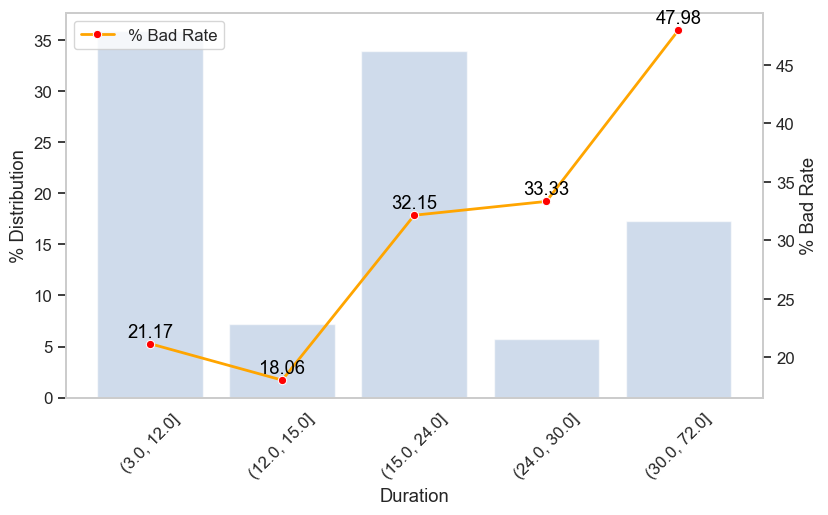

C:\Users\Admin\AppData\Local\Temp\ipykernel_12028\3203983165.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['bin_'+i] = pd.qcut(df_group[i].astype(float), q=5, duplicates='drop', precision=0)


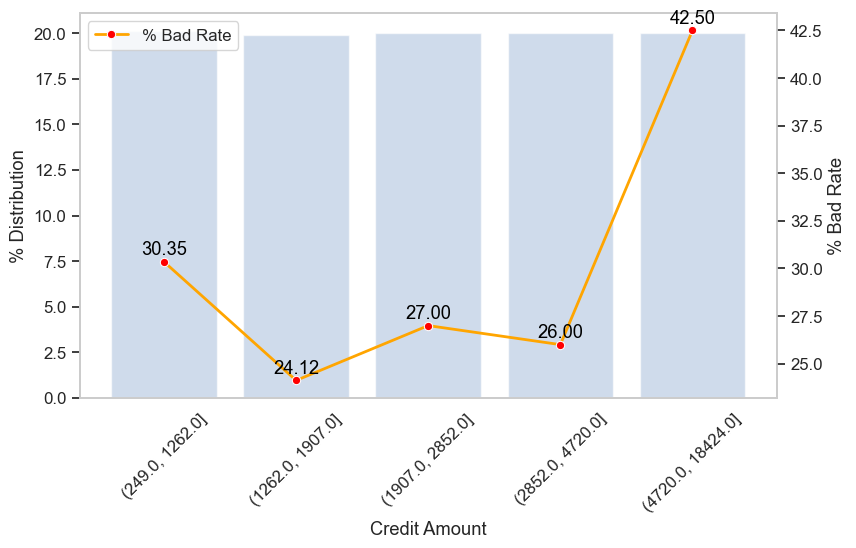

C:\Users\Admin\AppData\Local\Temp\ipykernel_12028\3203983165.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['bin_'+i] = pd.qcut(df_group[i].astype(float), q=5, duplicates='drop', precision=0)


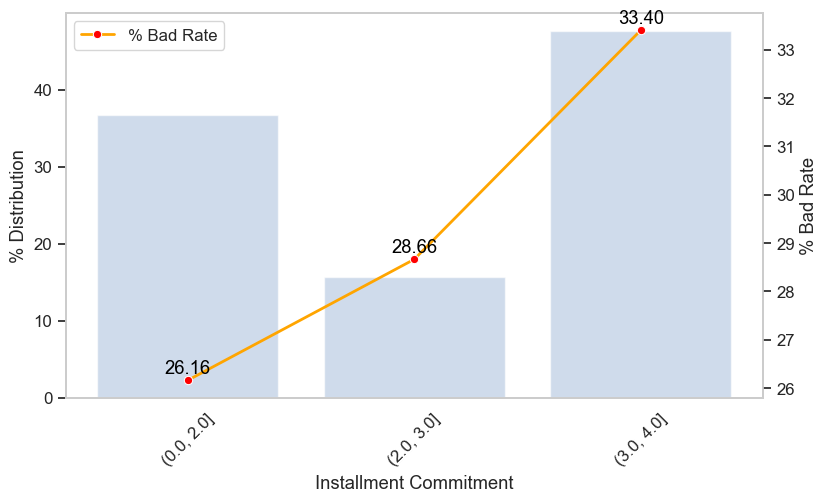

C:\Users\Admin\AppData\Local\Temp\ipykernel_12028\3203983165.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['bin_'+i] = pd.qcut(df_group[i].astype(float), q=5, duplicates='drop', precision=0)


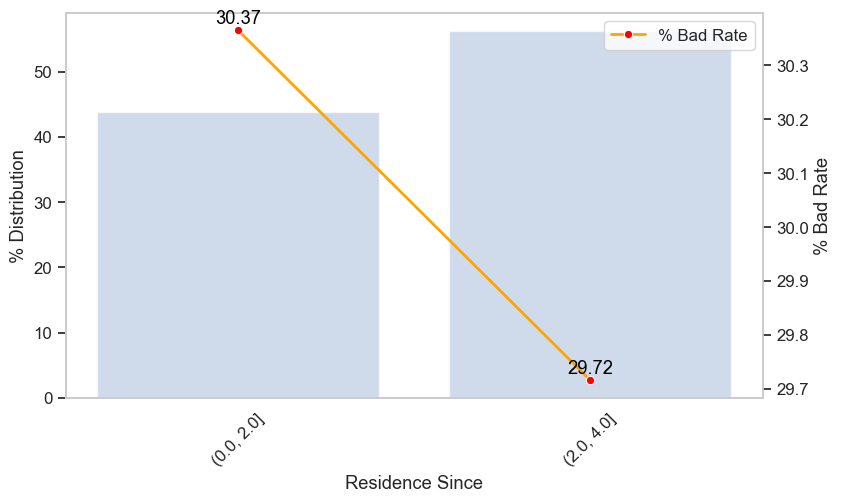

C:\Users\Admin\AppData\Local\Temp\ipykernel_12028\3203983165.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['bin_'+i] = pd.qcut(df_group[i].astype(float), q=5, duplicates='drop', precision=0)


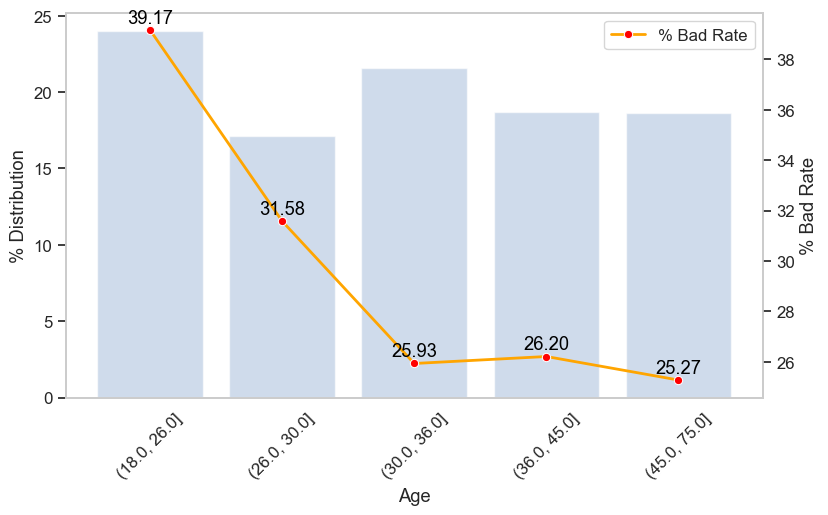

C:\Users\Admin\AppData\Local\Temp\ipykernel_12028\3203983165.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['bin_'+i] = pd.qcut(df_group[i].astype(float), q=5, duplicates='drop', precision=0)


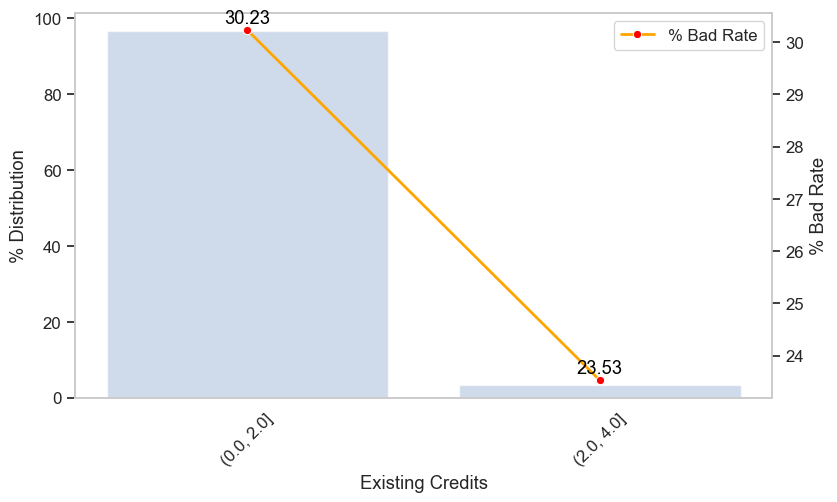

In [87]:
for i in df1._get_numeric_data().columns:
  if i == 'class':
    pass
  else:
    ### Generate dataframe for visualization ###

    df_group =df1[['class', i]]
    df_group['bin_'+i] = pd.qcut(df_group[i].astype(float), q=5, duplicates='drop', precision=0)
    df_group = df_group.groupby('bin_'+i).agg({'class': ['count', 'sum']})
    df_group.columns = df_group.columns.map('_'.join)
    df_group['dist'] = df_group['class_count']/df_group['class_count'].sum()
    df_group['bad_rate'] = df_group['class_sum']/df_group['class_count']
    df_group = df_group.reset_index()
 
    x1 = df_group['bin_'+i].astype(str)
    x2 = df_group.index
    y1 = df_group['dist']*100
    y2 = df_group['bad_rate']*100

    sns.set(font_scale=1.1)
    sns.set_style("whitegrid")
    fig, ax1  = plt.subplots(figsize=(9,5))
    plt.tick_params(axis='x', rotation = 45)

    ### y axis (left) is bar plot ###

    ax1.bar(x1,y1, data = df_group, color='lightsteelblue', alpha=.6)

    ### y axis (right) is line chart ###
    ax2 = ax1.twinx()
    ax2 = sns.lineplot(data = df_group , x = x2, y = y2,  marker='o',\
                    markerfacecolor='red', markersize=6, color='orange', 
                    linewidth=2, label='% Bad Rate')
    ax1.set_xlabel(i.replace("_"," ").title())
    ax1.set_ylabel('% Distribution')
    ax2.set_ylabel('% Bad Rate')
    ax1.grid(False)
    ax2.grid(False)

    for x,y in zip(x2,y2):
            label = "{:.2f}".format(y)
            plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,5), ha='center', color='black') 


    plt.show();




In [88]:
def mean_target_per_category(df, var):         
      temp_df = pd.Series(df[var].value_counts() / len(df)).reset_index()
      temp_df.columns = [var , '%Dist']
      temp_df = temp_df.merge(df.groupby([var])['class'].mean().reset_index(),
                              on=var,
                              how='left').sort_values(by='class').reset_index(drop=True)
      fig, ax = plt.subplots(figsize=(18, 6))
      plt.xticks(temp_df.index, temp_df[var], rotation=45)
      ax2 = ax.twinx()
      ax.bar(temp_df.index, temp_df["%Dist"]*100, color='lightsteelblue', 
            alpha=.6)
      
      ax2.plot(temp_df.index, temp_df["class"]*100, color='orange', label='Seconds',
                  marker='o', markerfacecolor='red', linewidth=2)
      ax.set_ylabel('% Distribution')
      ax.set_xlabel(var)
      ax2.set_ylabel('% Bad Rate')
      ax.grid(False)
      ax2.grid(False)
      for x,y in zip(temp_df.index, temp_df["class"]*100):
            label = "{:.2f}".format(y)
            plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,5), ha='center', color='black') 
      plt.show()

      return temp_df

checking_status


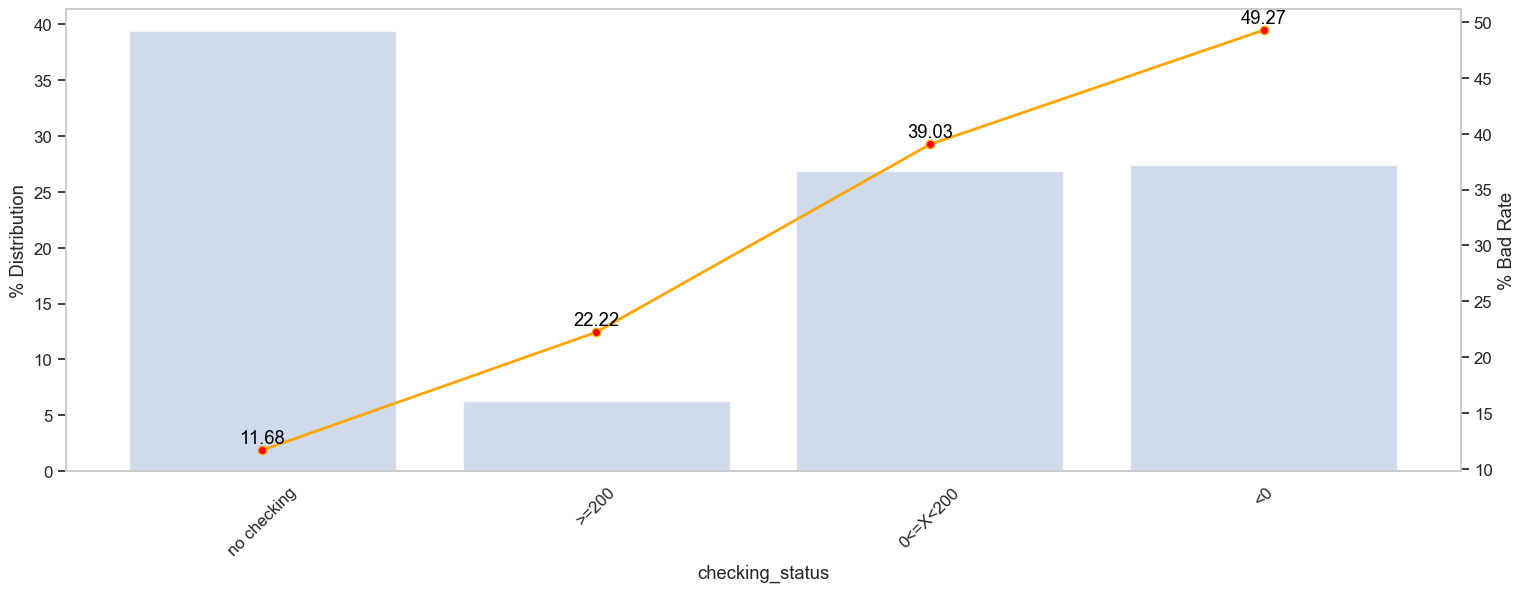

**********************************************************************
credit_history


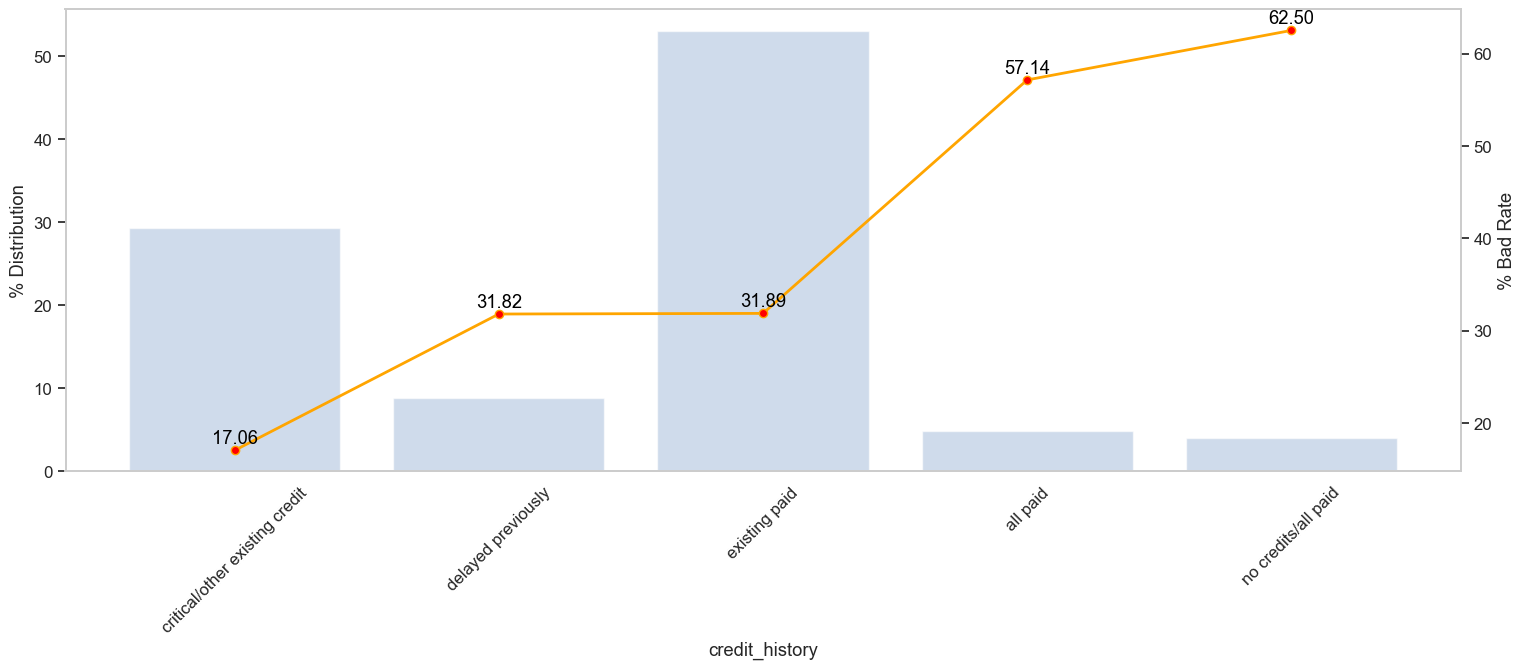

**********************************************************************
purpose


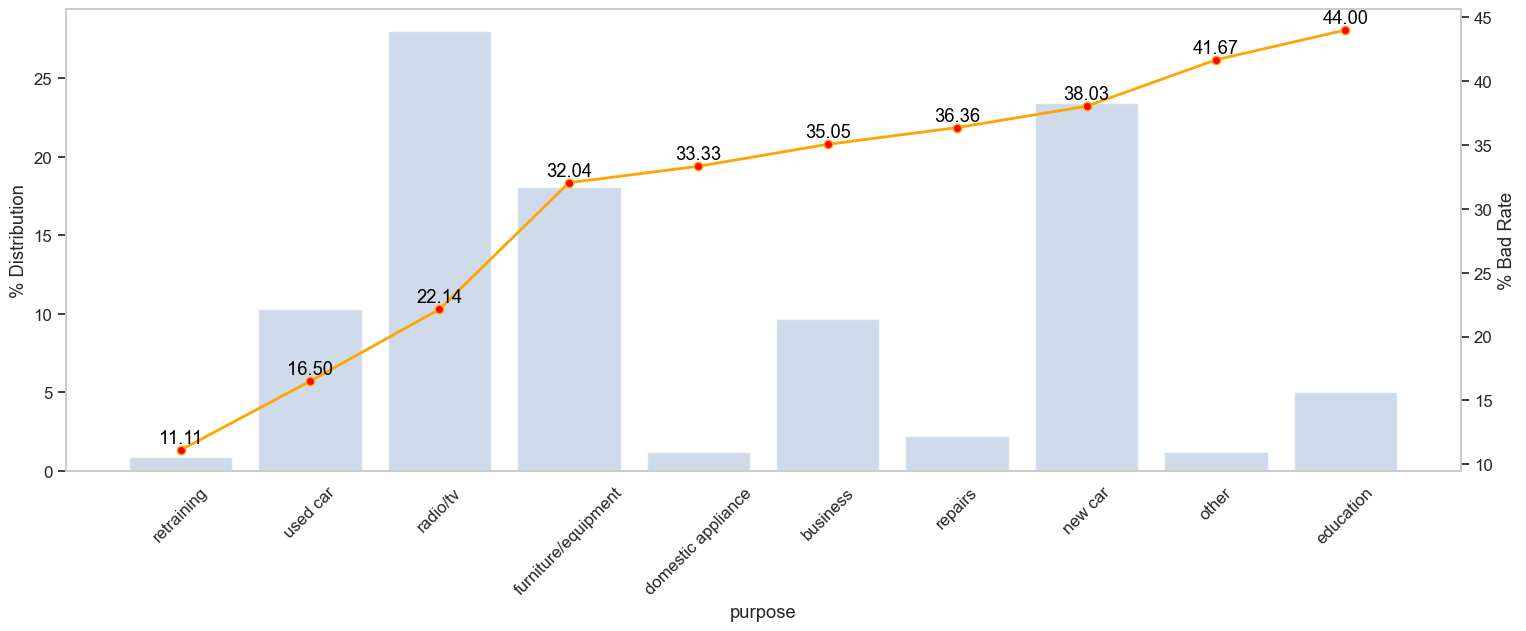

**********************************************************************
savings_status


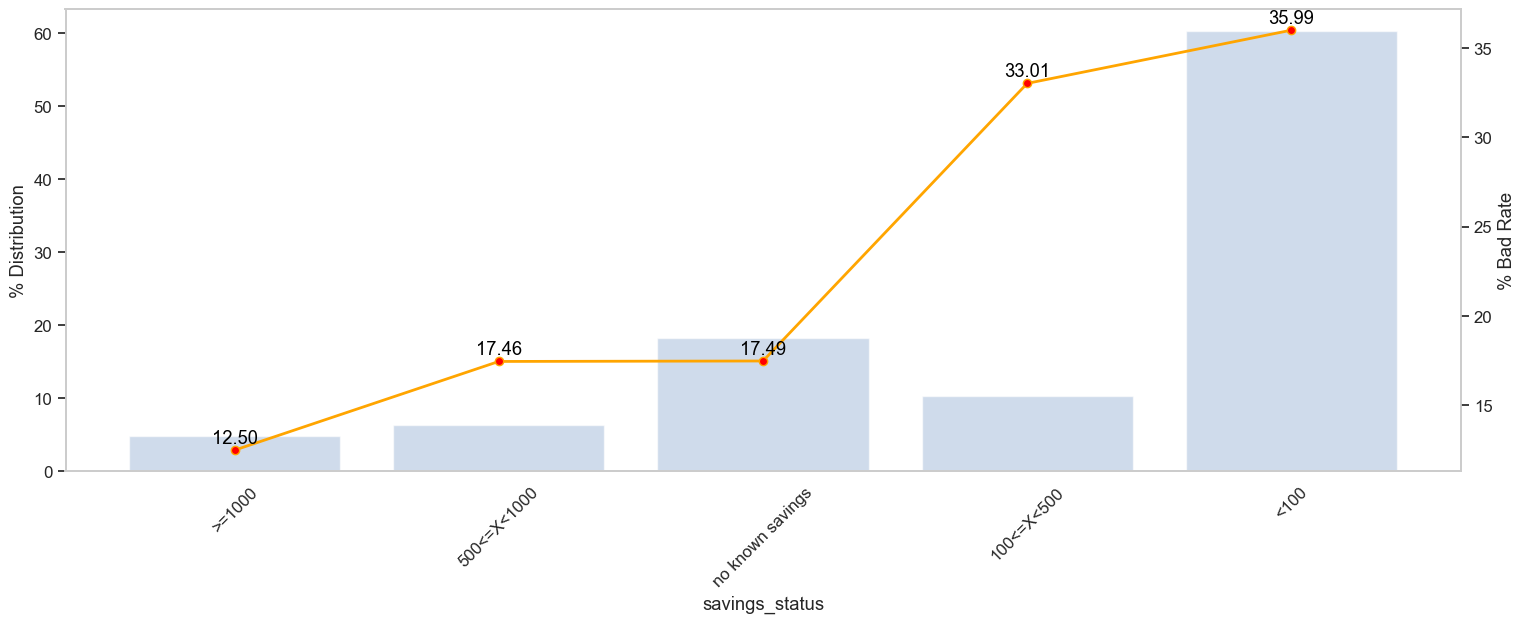

**********************************************************************
employment


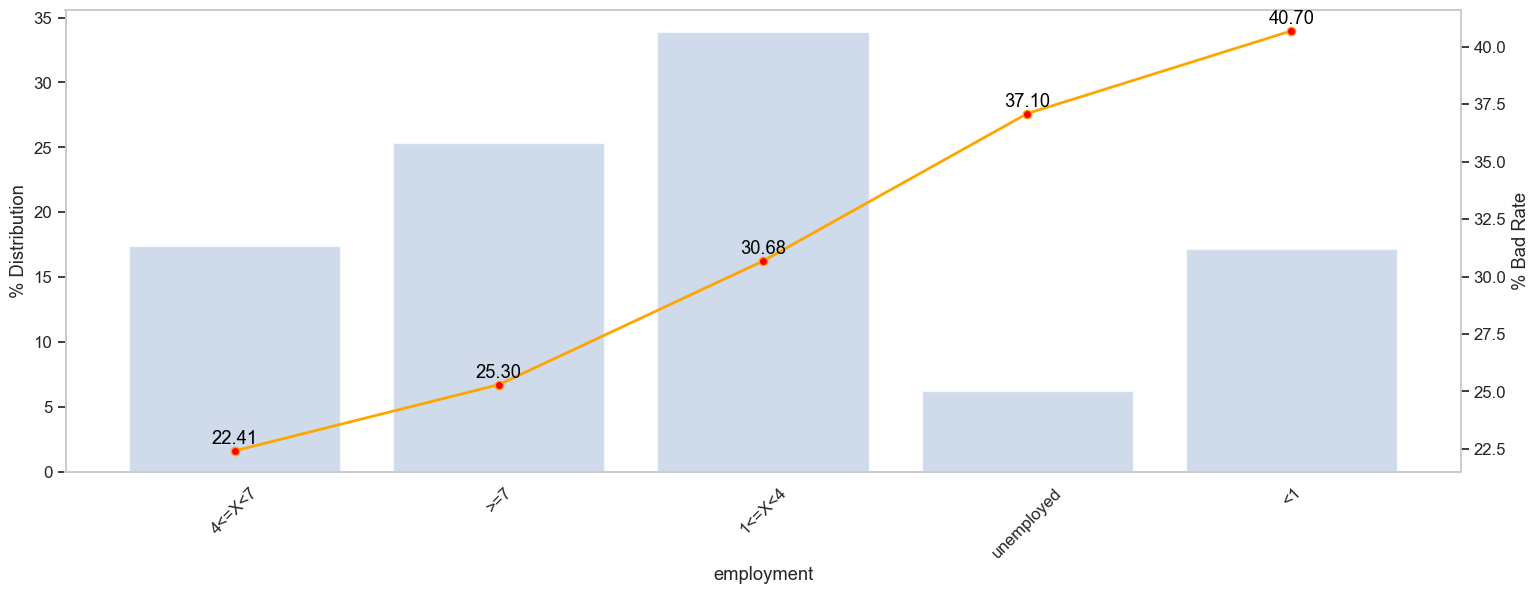

**********************************************************************
other_parties


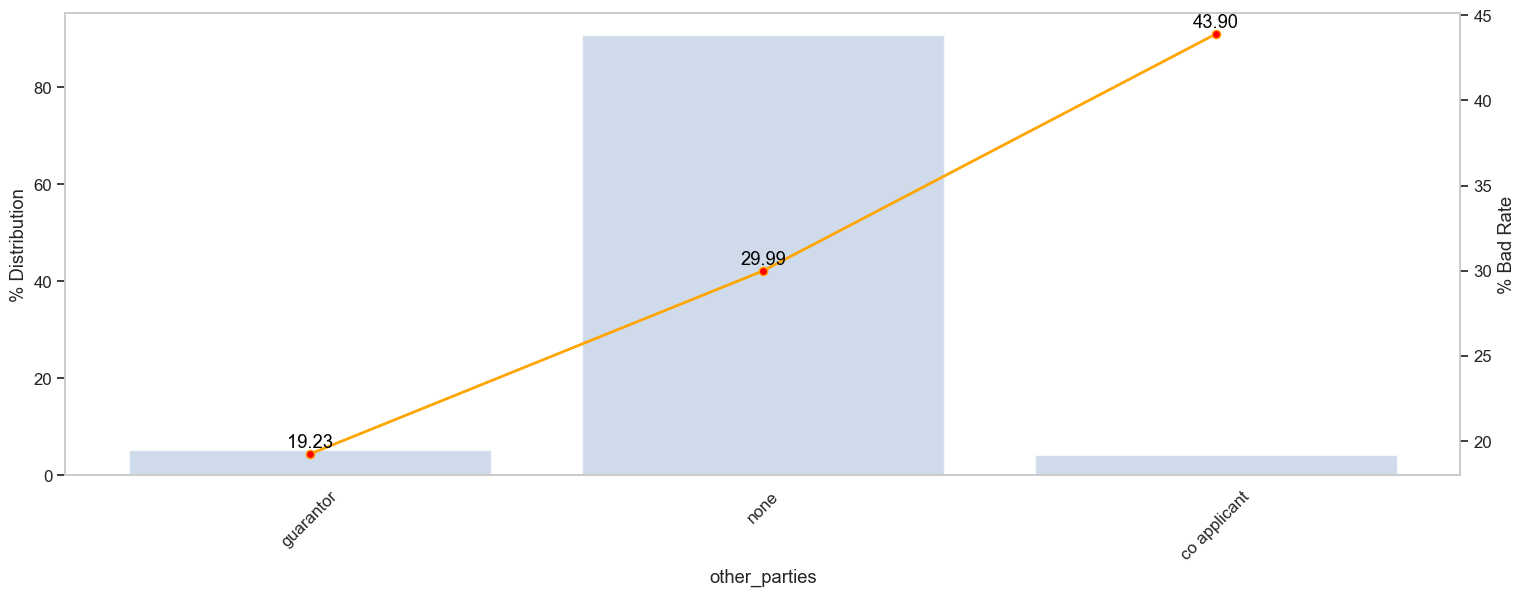

**********************************************************************
property_magnitude


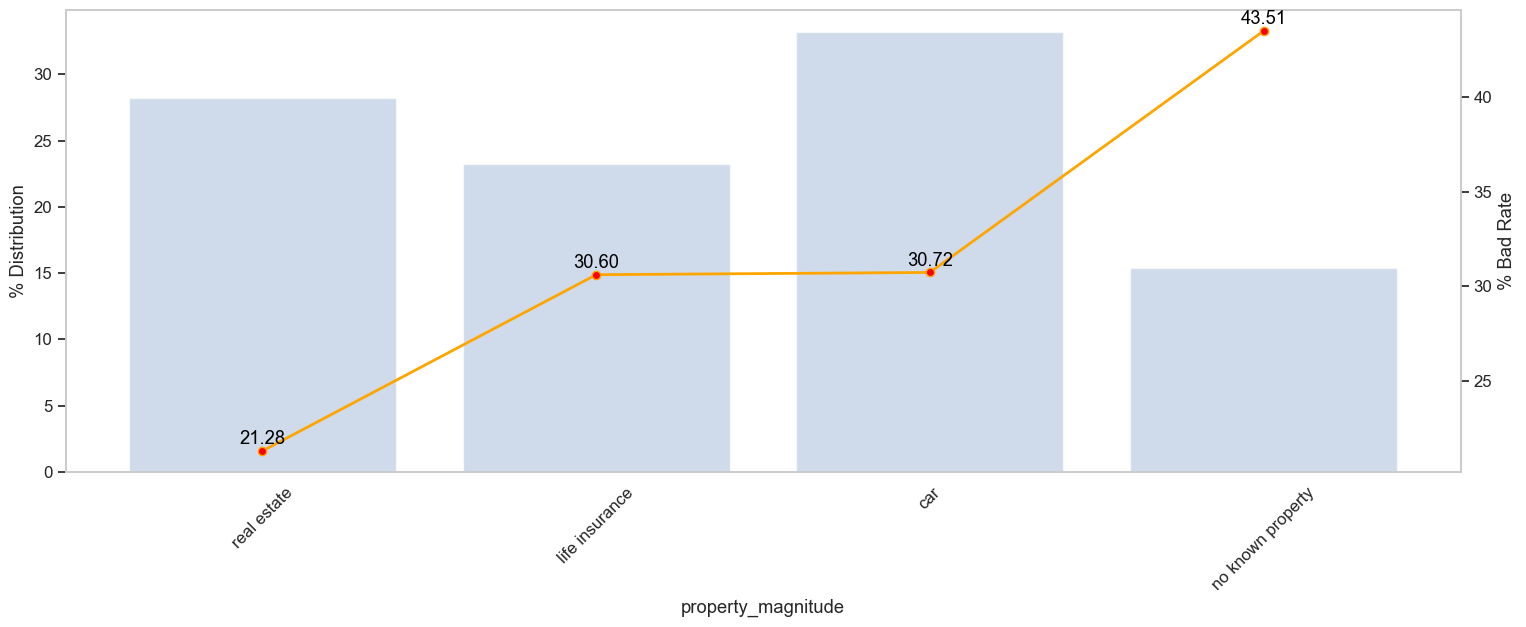

**********************************************************************
other_payment_plans


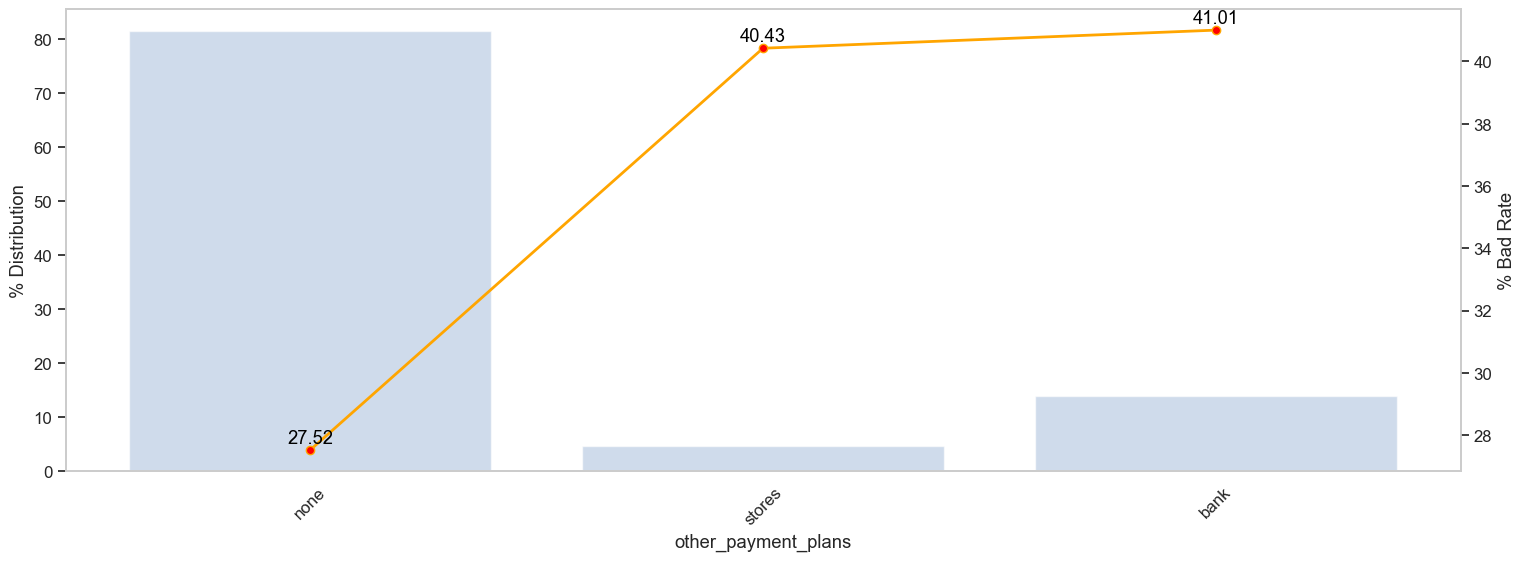

**********************************************************************
housing


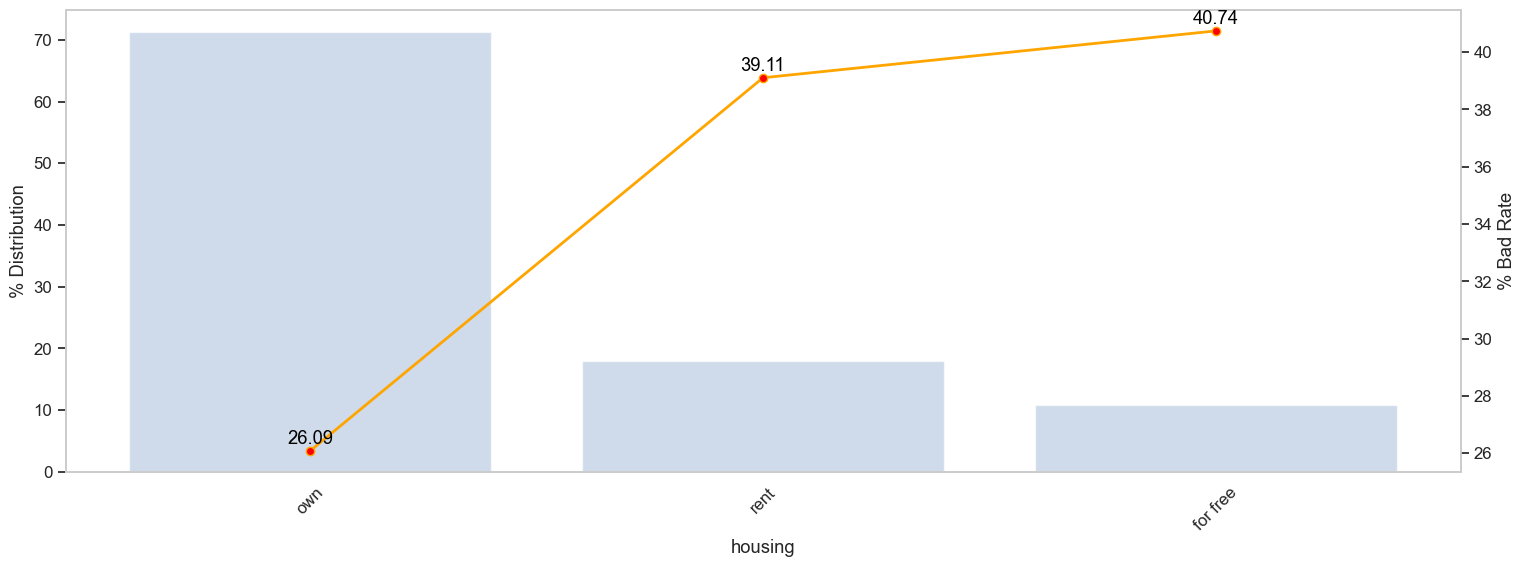

**********************************************************************
job


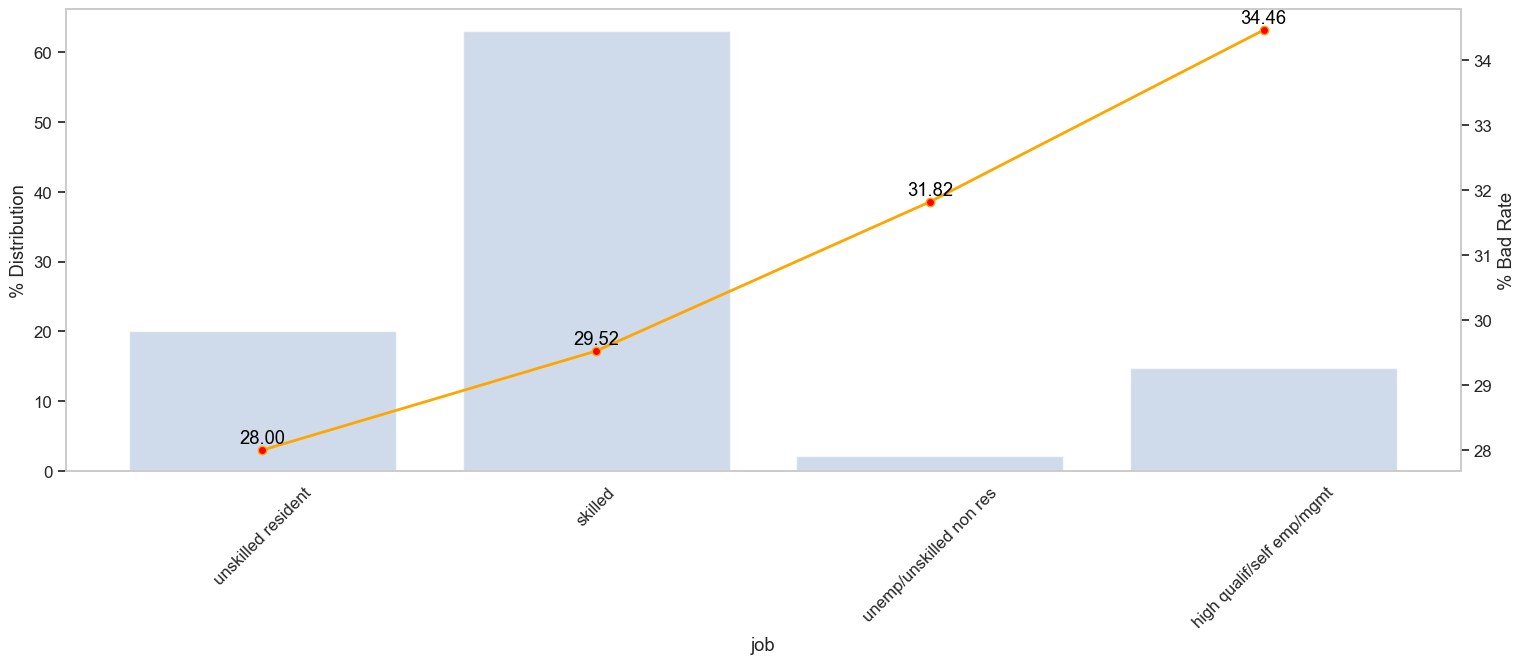

**********************************************************************
own_telephone


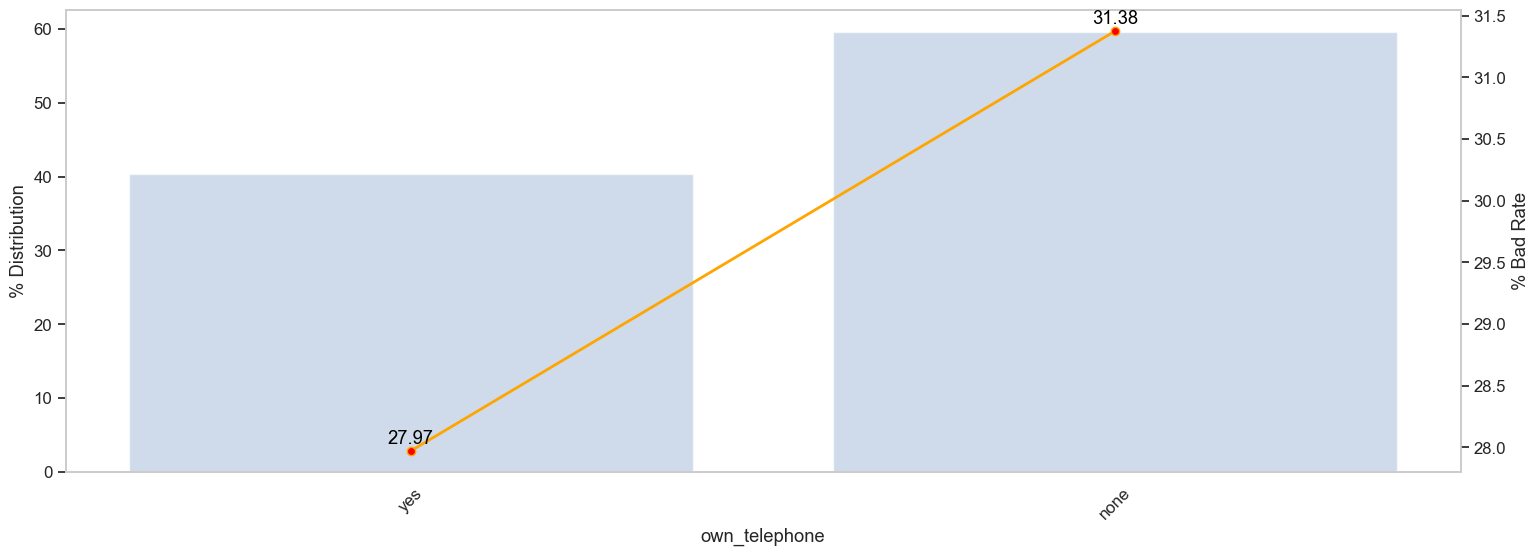

**********************************************************************
foreign_worker


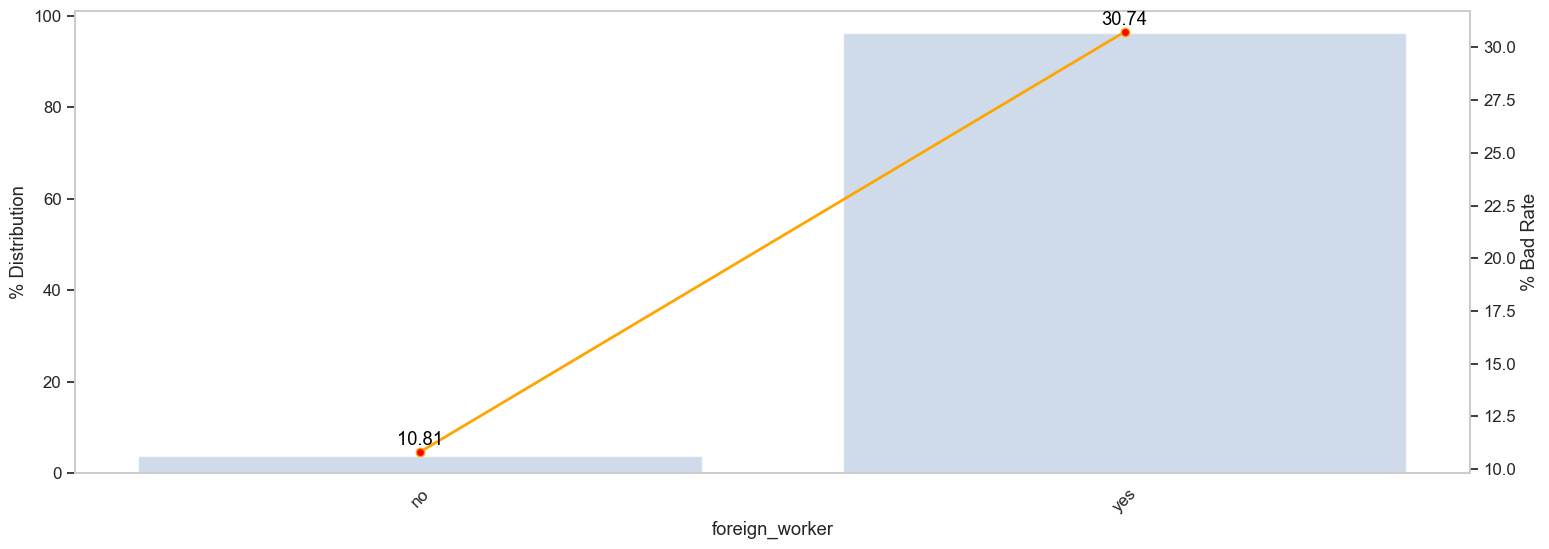

**********************************************************************
sex


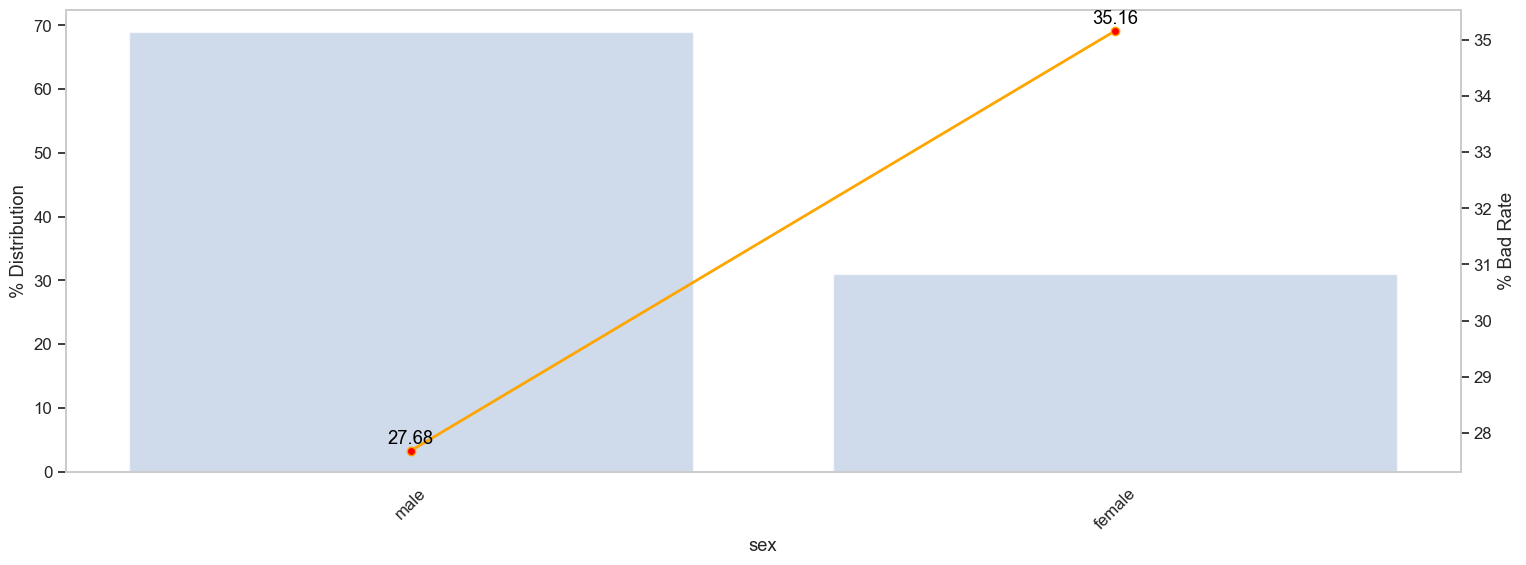

**********************************************************************
marriage


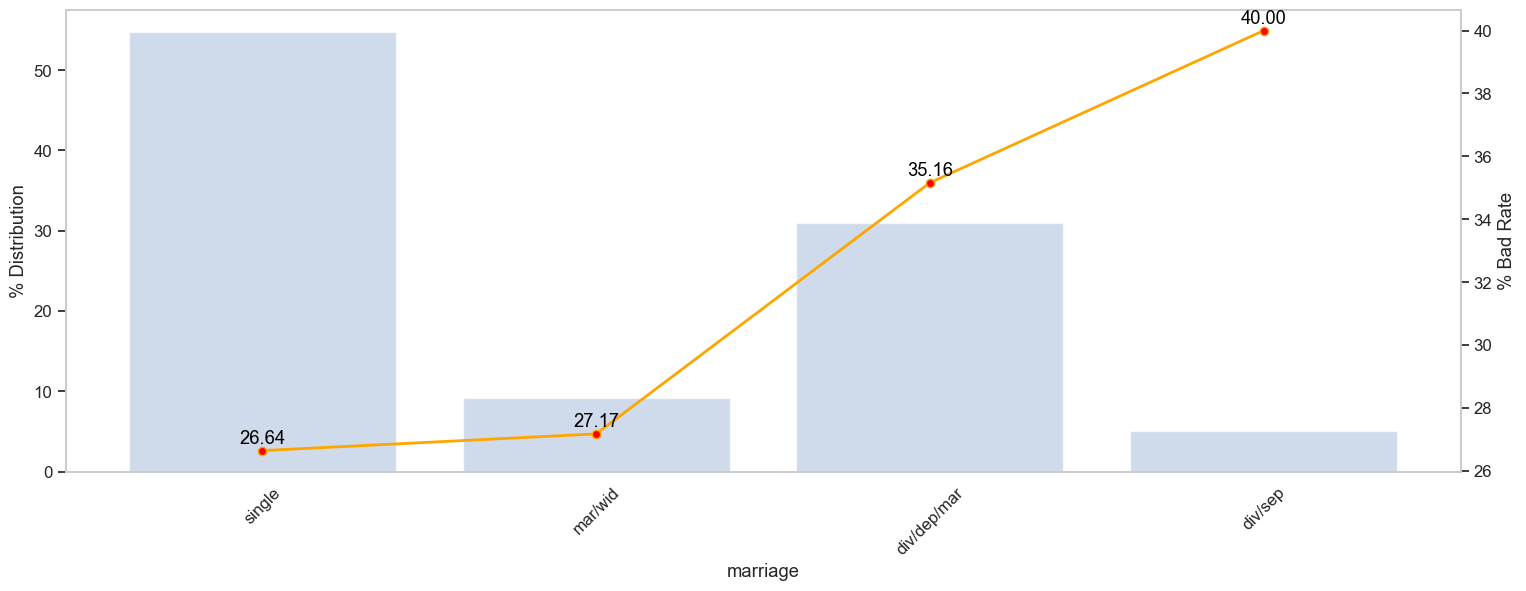

**********************************************************************


In [89]:
for col in df1.loc[:, df1.dtypes == object].columns:
  print(col)
  df_cat = mean_target_per_category(df1, col)
  print('*'*70)

In [90]:
def binning_numeric(df):
  
  for i in df._get_numeric_data().columns:
    if i == 'class':
      continue
    else:
      df[i] = pd.qcut(df[i].astype(float), q=5, duplicates='drop', precision=0).astype('object')
      print(i , '***')

  return df


In [91]:
df_bin = binning_numeric(df1)
df_bin.info()
df_woe = df_bin.copy()
df_woe.head()

duration ***
credit_amount ***
installment_commitment ***
residence_since ***
age ***
existing_credits ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   object
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   object
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   object
 8   other_parties           1000 non-null   object
 9   residence_since         1000 non-null   object
 10  property_magnitude      1000 non-null   object
 11  age                     1000 non-null   object
 12  other_payment_plans     1000 non-null   object
 13  ho

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,other_parties,residence_since,...,age,other_payment_plans,housing,existing_credits,job,own_telephone,foreign_worker,class,sex,marriage
0,<0,"(3.0, 12.0]",critical/other existing credit,radio/tv,"(249.0, 1262.0]",no known savings,>=7,"(3.0, 4.0]",none,"(2.0, 4.0]",...,"(45.0, 75.0]",none,own,"(0.0, 2.0]",skilled,yes,yes,0,male,single
1,0<=X<200,"(30.0, 72.0]",existing paid,radio/tv,"(4720.0, 18424.0]",<100,1<=X<4,"(0.0, 2.0]",none,"(0.0, 2.0]",...,"(18.0, 26.0]",none,own,"(0.0, 2.0]",skilled,none,yes,1,female,div/dep/mar
2,no checking,"(3.0, 12.0]",critical/other existing credit,education,"(1907.0, 2852.0]",<100,4<=X<7,"(0.0, 2.0]",none,"(2.0, 4.0]",...,"(45.0, 75.0]",none,own,"(0.0, 2.0]",unskilled resident,none,yes,0,male,single
3,<0,"(30.0, 72.0]",existing paid,furniture/equipment,"(4720.0, 18424.0]",<100,4<=X<7,"(0.0, 2.0]",guarantor,"(2.0, 4.0]",...,"(36.0, 45.0]",none,for free,"(0.0, 2.0]",skilled,none,yes,0,male,single
4,<0,"(15.0, 24.0]",delayed previously,new car,"(4720.0, 18424.0]",<100,1<=X<4,"(2.0, 3.0]",none,"(2.0, 4.0]",...,"(45.0, 75.0]",none,for free,"(0.0, 2.0]",skilled,none,yes,1,male,single


In [92]:
def woe_iv(df_woe):
  iv_dict = {}
  final_iv = {}

  for i in df_woe.select_dtypes(object).columns:

    ### Calculate WOE and IV ###
    d = pd.DataFrame(df_woe.groupby([i]).size(), columns=['total'])

    d['count_bad'] = df_woe.groupby([i])['class'].sum()
    d['count_good'] = d['total']-d['count_bad']

    d['dist_bad'] = d['count_bad']/d['count_bad'].sum()
    d['dist_good'] = d['count_good']/d['count_good'].sum()
    
    d['woe'] = np.log(d.dist_bad/d.dist_good)
    d["iv"] = (d.dist_bad-d.dist_good)*np.log(d.dist_bad/d.dist_good)

    d = d.replace([np.inf, -np.inf], 0)
    d = d.reset_index()
    
    ### Append dataframe in dictionary ###
    if i not in final_iv:
      final_iv[i] = []
    final_iv[i].append(d)
    
    ### Map WOE value ###
    woe_dict = d.groupby([i])['woe'].mean().to_dict()
    df_woe['woe_'+i] = df_woe[i].map(woe_dict)
    
    ### Calculate final IV of each feature and append in dictionary
    if i not in iv_dict:
      iv_dict[i] = []
    iv_dict[i].append(d['iv'].sum())
  
  ### Generate IV dataframe
  iv_df = pd.DataFrame.from_dict(iv_dict, orient='index', columns=['IV'])
  iv_df.index.name = 'Feature'

  return final_iv, iv_df, df_woe

In [93]:
final_iv, IV, df_woe = woe_iv(df_bin)
final_iv

{'checking_status': [  checking_status  total  count_bad  count_good  dist_bad  dist_good  \
  0        0<=X<200    269        105         164  0.350000   0.234286   
  1              <0    274        135         139  0.450000   0.198571   
  2           >=200     63         14          49  0.046667   0.070000   
  3     no checking    394         46         348  0.153333   0.497143   
  
          woe        iv  
  0  0.401392  0.046447  
  1  0.818099  0.205693  
  2 -0.405465  0.009461  
  3 -1.176263  0.404410  ],
 'duration': [       duration  total  count_bad  count_good  dist_bad  dist_good       woe  \
  0   (3.0, 12.0]    359         76         283  0.253333   0.404286 -0.467416   
  1  (12.0, 15.0]     72         13          59  0.043333   0.084286 -0.665290   
  2  (15.0, 24.0]    339        109         230  0.363333   0.328571  0.100566   
  3  (24.0, 30.0]     57         19          38  0.063333   0.054286  0.154151   
  4  (30.0, 72.0]    173         83          90  0.276

In [94]:
IV.sort_values(by='IV', ascending=False)

,IV
Feature,
checking_status,0.666012
credit_history,0.293234
duration,0.216183
savings_status,0.196010
purpose,0.169195
property_magnitude,0.112638
credit_amount,0.093362
employment,0.086434
housing,0.083293


In [95]:
def iv_group(df):
  
    if df['IV'] > 0.5:
        val = 'Suspicious'
    elif df['IV'] > 0.3 and df['IV'] <= 0.5 :
        val = 'Strong'
    elif df['IV'] > 0.1 and df['IV'] <= 0.3 :
        val = 'Medium'
    elif df['IV'] > 0.02 and df['IV'] <= 0.1 :
        val = 'Weak'
    else:
        val = 'Not useful'

    return val

IV['Predictive_Power'] = IV.apply(iv_group, axis=1)
IV.sort_values('IV',ascending=False)

,IV,Predictive_Power
Feature,,
checking_status,0.666012,Suspicious
credit_history,0.293234,Medium
duration,0.216183,Medium
savings_status,0.196010,Medium
purpose,0.169195,Medium
property_magnitude,0.112638,Medium
credit_amount,0.093362,Weak
employment,0.086434,Weak
housing,0.083293,Weak


In [96]:
df_woe

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,other_parties,residence_since,...,woe_property_magnitude,woe_age,woe_other_payment_plans,woe_housing,woe_existing_credits,woe_job,woe_own_telephone,woe_foreign_worker,woe_sex,woe_marriage
0,<0,"(3.0, 12.0]",critical/other existing credit,radio/tv,"(249.0, 1262.0]",no known savings,>=7,"(3.0, 4.0]",none,"(2.0, 4.0]",...,-0.461035,-0.237028,-0.121179,-0.194156,0.010822,-0.022780,-0.098638,0.034867,-0.113035,-0.165548
1,0<=X<200,"(30.0, 72.0]",existing paid,radio/tv,"(4720.0, 18424.0]",<100,1<=X<4,"(0.0, 2.0]",none,"(0.0, 2.0]",...,-0.461035,0.406986,-0.121179,-0.194156,0.010822,-0.022780,0.064691,0.034867,0.235341,0.235341
2,no checking,"(3.0, 12.0]",critical/other existing credit,education,"(1907.0, 2852.0]",<100,4<=X<7,"(0.0, 2.0]",none,"(2.0, 4.0]",...,-0.461035,-0.237028,-0.121179,-0.194156,0.010822,-0.097164,0.064691,0.034867,-0.113035,-0.165548
3,<0,"(30.0, 72.0]",existing paid,furniture/equipment,"(4720.0, 18424.0]",<100,4<=X<7,"(0.0, 2.0]",guarantor,"(2.0, 4.0]",...,0.028573,-0.188136,-0.121179,0.472604,0.010822,-0.022780,0.064691,0.034867,-0.113035,-0.165548
4,<0,"(15.0, 24.0]",delayed previously,new car,"(4720.0, 18424.0]",<100,1<=X<4,"(2.0, 3.0]",none,"(2.0, 4.0]",...,0.586082,-0.237028,-0.121179,0.472604,0.010822,-0.022780,0.064691,0.034867,-0.113035,-0.165548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,"(3.0, 12.0]",existing paid,furniture/equipment,"(1262.0, 1907.0]",<100,4<=X<7,"(2.0, 3.0]",none,"(2.0, 4.0]",...,-0.461035,-0.202524,-0.121179,-0.194156,0.010822,-0.097164,0.064691,0.034867,0.235341,0.235341
996,<0,"(24.0, 30.0]",existing paid,used car,"(2852.0, 4720.0]",<100,1<=X<4,"(3.0, 4.0]",none,"(2.0, 4.0]",...,0.028573,-0.188136,-0.121179,-0.194156,0.010822,0.204413,-0.098638,0.034867,-0.113035,0.441833
997,no checking,"(3.0, 12.0]",existing paid,radio/tv,"(249.0, 1262.0]",<100,>=7,"(3.0, 4.0]",none,"(2.0, 4.0]",...,0.034191,-0.188136,-0.121179,-0.194156,0.010822,-0.022780,0.064691,0.034867,-0.113035,-0.165548
998,<0,"(30.0, 72.0]",existing paid,radio/tv,"(1262.0, 1907.0]",<100,1<=X<4,"(3.0, 4.0]",none,"(2.0, 4.0]",...,0.586082,0.406986,-0.121179,0.472604,0.010822,-0.022780,-0.098638,0.034867,-0.113035,-0.165548


In [97]:
X = df_woe.loc[:, df_woe.columns.str.startswith('woe_')]
y = df_woe['class']
X.head()

,woe_checking_status,woe_duration,woe_credit_history,woe_purpose,woe_credit_amount,woe_savings_status,woe_employment,woe_installment_commitment,woe_other_parties,woe_residence_since,woe_property_magnitude,woe_age,woe_other_payment_plans,woe_housing,woe_existing_credits,woe_job,woe_own_telephone,woe_foreign_worker,woe_sex,woe_marriage
0,0.818099,-0.467416,-0.733741,-0.410063,0.016529,-0.704246,-0.235566,0.157300,-0.000525,-0.013594,-0.461035,-0.237028,-0.121179,-0.194156,0.010822,-0.022780,-0.098638,0.034867,-0.113035,-0.165548
1,0.401392,0.766329,0.088319,-0.410063,0.545017,0.271358,0.032103,-0.190473,-0.000525,0.017335,-0.461035,0.406986,-0.121179,-0.194156,0.010822,-0.022780,0.064691,0.034867,0.235341,0.235341
2,-1.176263,-0.467416,-0.733741,0.606136,-0.147325,0.271358,-0.394415,-0.190473,-0.000525,-0.013594,-0.461035,-0.237028,-0.121179,-0.194156,0.010822,-0.097164,0.064691,0.034867,-0.113035,-0.165548
3,0.818099,0.766329,0.088319,0.095557,0.545017,0.271358,-0.394415,-0.190473,-0.587787,-0.013594,0.028573,-0.188136,-0.121179,0.472604,0.010822,-0.022780,0.064691,0.034867,-0.113035,-0.165548
4,0.818099,0.100566,0.085158,0.359200,0.545017,0.271358,0.032103,-0.064539,-0.000525,-0.013594,0.586082,-0.237028,-0.121179,0.472604,0.010822,-0.022780,0.064691,0.034867,-0.113035,-0.165548


In [98]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99, stratify=y)

print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

X_train

class
0    0.7
1    0.3
Name: proportion, dtype: float64
class
0    0.7
1    0.3
Name: proportion, dtype: float64


,woe_checking_status,woe_duration,woe_credit_history,woe_purpose,woe_credit_amount,woe_savings_status,woe_employment,woe_installment_commitment,woe_other_parties,woe_residence_since,woe_property_magnitude,woe_age,woe_other_payment_plans,woe_housing,woe_existing_credits,woe_job,woe_own_telephone,woe_foreign_worker,woe_sex,woe_marriage
411,-1.176263,0.766329,-0.733741,-0.773836,0.545017,0.271358,-0.394415,-0.064539,-0.000525,0.017335,0.034191,-0.202524,-0.121179,-0.194156,0.010822,0.204413,-0.098638,0.034867,-0.113035,-0.165548
995,-1.176263,-0.467416,0.088319,0.095557,-0.298781,0.271358,-0.394415,-0.064539,-0.000525,-0.013594,-0.461035,-0.202524,-0.121179,-0.194156,0.010822,-0.097164,0.064691,0.034867,0.235341,0.235341
362,-0.405465,-0.467416,0.085158,0.359200,-0.147325,0.271358,0.032103,-0.190473,-0.000525,0.017335,0.034191,-0.202524,0.459532,-0.194156,0.010822,-0.022780,-0.098638,0.034867,0.235341,0.235341
476,-1.176263,0.766329,0.088319,-0.773836,-0.147325,-0.706051,0.032103,0.157300,-0.000525,-0.013594,0.034191,0.406986,-0.121179,-0.194156,0.010822,-0.022780,0.064691,0.034867,-0.113035,-0.165548
795,-1.176263,-0.467416,0.088319,0.095557,-0.147325,0.139552,0.470820,-0.190473,-0.000525,-0.013594,0.028573,0.406986,-0.121179,0.404445,0.010822,-0.022780,0.064691,0.034867,0.235341,0.235341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,-1.176263,-0.467416,-0.733741,0.095557,0.016529,0.271358,0.470820,-0.190473,-0.000525,-0.013594,0.028573,0.406986,-0.121179,0.404445,0.010822,-0.097164,0.064691,0.034867,0.235341,0.235341
741,0.401392,-0.467416,1.134980,-0.410063,0.016529,0.271358,0.032103,0.157300,-0.000525,-0.013594,-0.461035,0.406986,0.459532,-0.194156,0.010822,-0.097164,0.064691,0.034867,-0.113035,-0.165548
676,-1.176263,0.100566,-0.733741,0.095557,0.545017,0.271358,-0.235566,0.157300,-0.000525,-0.013594,0.034191,-0.202524,-0.121179,-0.194156,0.010822,-0.022780,-0.098638,0.034867,-0.113035,-0.165548
594,0.818099,0.100566,1.134980,0.510826,-0.298781,-0.704246,-0.235566,0.157300,-0.000525,-0.013594,0.034191,-0.188136,0.459532,-0.194156,0.010822,0.204413,-0.098638,0.034867,-0.113035,-0.165548


In [99]:
import statsmodels.api as sm

In [100]:
def train_model(X_train, y_train):

    ### Fit logistic regression ###
    model = sm.Logit(y_train, sm.add_constant(X_train)).fit(disp=True, 
                                                            maxiter=100,
                                                            intercept=True)

    model.summary()

    results_as_html = model.summary().tables[1].as_html()
    summary = pd.read_html(results_as_html, header=0, index_col=0)[0]
    summary['Feature'] = summary.index
    summary = summary.reset_index(drop=True)
    summary['Feature'] = summary['Feature'].str.replace('woe_', '')
    summary = summary.set_index(['Feature'], drop=True)

    return model, summary

In [101]:
lr, lr_summary = train_model(X_train, y_train)
lr_summary

Optimization terminated successfully.
         Current function value: 0.451711
         Iterations 7


C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method newton is: tol, ridge_factor. The list of unsupported keyword arguments passed include: intercept. After release 0.14, this will raise.
  warnings.warn(


,coef,std err,z,P>|z|,[0.025,0.975]
Feature,,,,,,
const,-0.9100,0.097,-9.406,0.000,-1.100,-0.720
checking_status,0.7539,0.121,6.248,0.000,0.517,0.990
duration,0.7402,0.225,3.286,0.001,0.299,1.182
credit_history,0.7726,0.180,4.297,0.000,0.420,1.125
purpose,1.0696,0.235,4.550,0.000,0.609,1.530
...,...,...,...,...,...,...
job,-0.2531,1.130,-0.224,0.823,-2.468,1.962
own_telephone,3.0358,1.361,2.231,0.026,0.368,5.703
foreign_worker,0.9999,0.517,1.934,0.053,-0.013,2.013


In [102]:
y_pred_train = lr.predict(sm.add_constant(X_train))
y_pred_test = lr.predict(sm.add_constant(X_test))

y_pred_test

460    0.403002
864    0.169939
753    0.250173
609    0.037008
155    0.415032
         ...   
479    0.148157
378    0.765925
739    0.844550
768    0.100152
596    0.715222
Length: 200, dtype: float64

In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [104]:
def vif_calculation(X):
  
  features = X.copy()
  features.columns = features.columns.str.replace('woe_', '')
  features = features.assign(const=1)

  vif = pd.DataFrame()
  vif["Feature"] = features.columns
  vif["VIF Factor"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
  
  return vif

In [105]:
vif = vif_calculation(X)
vif

,Feature,VIF Factor
0,checking_status,1.164504
1,duration,1.334613
2,credit_history,1.136231
3,purpose,1.057136
4,credit_amount,1.360111
...,...,...
16,own_telephone,1.290809
17,foreign_worker,1.058047
18,sex,2.760221
19,marriage,2.704594


In [106]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, classification_report

In [107]:
def roc_gini(y, y_pred_proba):

  assert y.shape == y_pred_proba.shape
  fpr, tpr, _ = metrics.roc_curve(y, y_pred_proba)
  auc = metrics.roc_auc_score(y, y_pred_proba)
  gini = (2 * auc - 1)*100

  fig = plt.figure(figsize=(8,6))
  plt.plot(fpr, tpr, color='C0', label='%s AUC = %0.4f, Gini = %0.2f' % ('Model: ', auc,  gini), 
           linewidth=2.5)
  plt.plot([0, 1], [0, 1], color='darkgrey', linestyle='--', linewidth=2)
  plt.xlim([-0.01, 1.01])
  plt.ylim([-0.01, 1.01])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc='lower right',fontsize='small')
  plt.grid(False)
  plt.show()

Training set


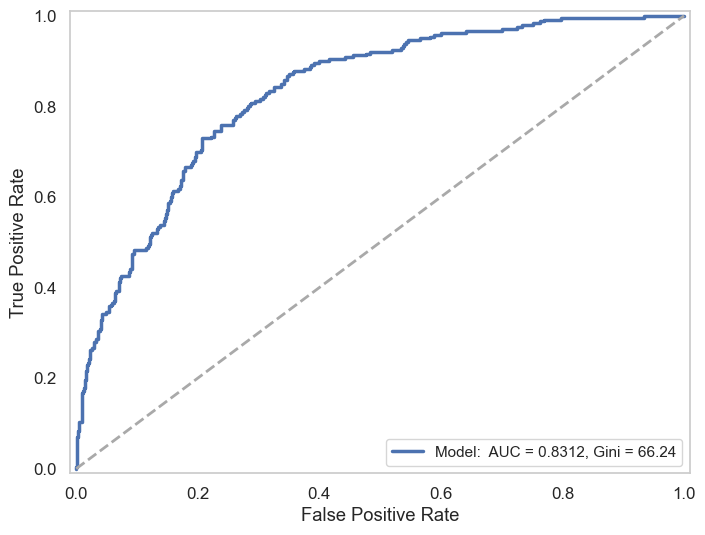

Test set


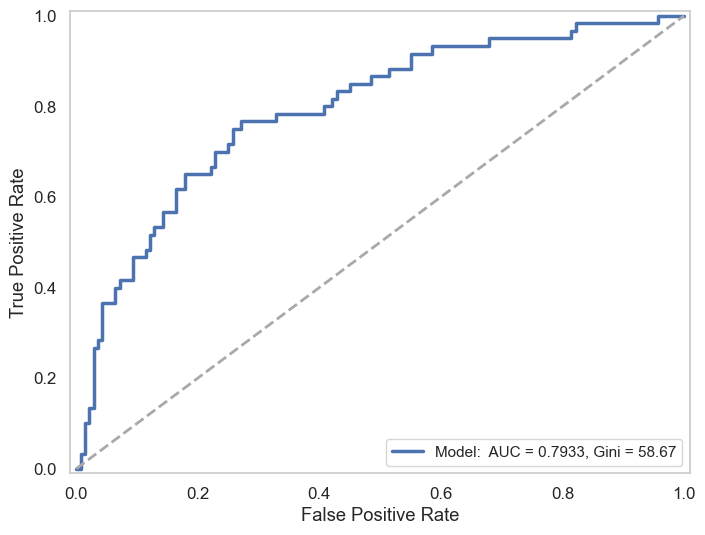

In [108]:
print('Training set')
roc_gini(y_train.values, y_pred_train)
    
print('Test set')
roc_gini(y_test.values, y_pred_test)

In [109]:
def summary_model(IV, vif, summary):
    
    summary_model = IV.merge(vif, left_on= 'Feature', right_on='Feature').merge(lr_summary ,on='Feature')
    summary_model = summary_model.rename(columns={'P>|z|': "p-value", "VIF Factor": "vif", "IV":"iv"})
    ### calculate feature importance ###
    summary_model['feature_importance'] = (summary_model['coef'].abs()/summary_model['coef'].abs().sum())*100
    
    return summary_model

In [110]:
summary = summary_model(IV, vif, lr_summary)
summary

,Feature,iv,Predictive_Power,vif,coef,std err,z,p-value,[0.025,0.975],feature_importance
0,checking_status,0.666012,Suspicious,1.164504,0.7539,0.121,6.248,0.000,0.517,0.990,3.323283
1,duration,0.216183,Medium,1.334613,0.7402,0.225,3.286,0.001,0.299,1.182,3.262892
2,credit_history,0.293234,Medium,1.136231,0.7726,0.180,4.297,0.000,0.420,1.125,3.405715
3,purpose,0.169195,Medium,1.057136,1.0696,0.235,4.550,0.000,0.609,1.530,4.714927
4,credit_amount,0.093362,Weak,1.360111,1.0146,0.342,2.963,0.003,0.343,1.686,4.472480
5,savings_status,0.196010,Medium,1.084832,1.0549,0.236,4.462,0.000,0.592,1.518,4.650127
6,employment,0.086434,Weak,1.144368,0.5188,0.332,1.563,0.118,-0.132,1.170,2.286933
7,installment_commitment,0.025569,Weak,1.092697,2.2513,0.613,3.673,0.000,1.050,3.453,9.924004
8,other_parties,0.032019,Weak,1.043419,0.7601,0.513,1.481,0.139,-0.246,1.766,3.350613
9,residence_since,0.000236,Not useful,1.171337,5.0626,6.584,0.769,0.442,-7.843,17.968,22.316556


In [111]:
summary['Feature'].loc[summary['p-value']>0.005].to_list()



['employment',
 'other_parties',
 'residence_since',
 'property_magnitude',
 'age',
 'other_payment_plans',
 'housing',
 'existing_credits',
 'job',
 'own_telephone',
 'foreign_worker',
 'sex',
 'marriage']

In [112]:
X1 = X.drop(['woe_housing' , 'woe_sex' , 'woe_existing_credits' , 'woe_residence_since' , 'woe_duration' , 'woe_own_telephone'] , axis = 1 )

y1 = df_woe['class']
X1.head()

,woe_checking_status,woe_credit_history,woe_purpose,woe_credit_amount,woe_savings_status,woe_employment,woe_installment_commitment,woe_other_parties,woe_property_magnitude,woe_age,woe_other_payment_plans,woe_job,woe_foreign_worker,woe_marriage
0,0.818099,-0.733741,-0.410063,0.016529,-0.704246,-0.235566,0.157300,-0.000525,-0.461035,-0.237028,-0.121179,-0.022780,0.034867,-0.165548
1,0.401392,0.088319,-0.410063,0.545017,0.271358,0.032103,-0.190473,-0.000525,-0.461035,0.406986,-0.121179,-0.022780,0.034867,0.235341
2,-1.176263,-0.733741,0.606136,-0.147325,0.271358,-0.394415,-0.190473,-0.000525,-0.461035,-0.237028,-0.121179,-0.097164,0.034867,-0.165548
3,0.818099,0.088319,0.095557,0.545017,0.271358,-0.394415,-0.190473,-0.587787,0.028573,-0.188136,-0.121179,-0.022780,0.034867,-0.165548
4,0.818099,0.085158,0.359200,0.545017,0.271358,0.032103,-0.064539,-0.000525,0.586082,-0.237028,-0.121179,-0.022780,0.034867,-0.165548


In [113]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1, test_size=0.3, random_state=100, stratify=y)

In [114]:
lr_1, lr_1_summary = train_model(X_train_1, y_train_1)

Optimization terminated successfully.
         Current function value: 0.479881
         Iterations 6


C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method newton is: tol, ridge_factor. The list of unsupported keyword arguments passed include: intercept. After release 0.14, this will raise.
  warnings.warn(


In [115]:
y_pred_train_1 = lr_1.predict(sm.add_constant(X_train_1))
y_pred_test_1 = lr_1.predict(sm.add_constant(X_test_1))

Training set


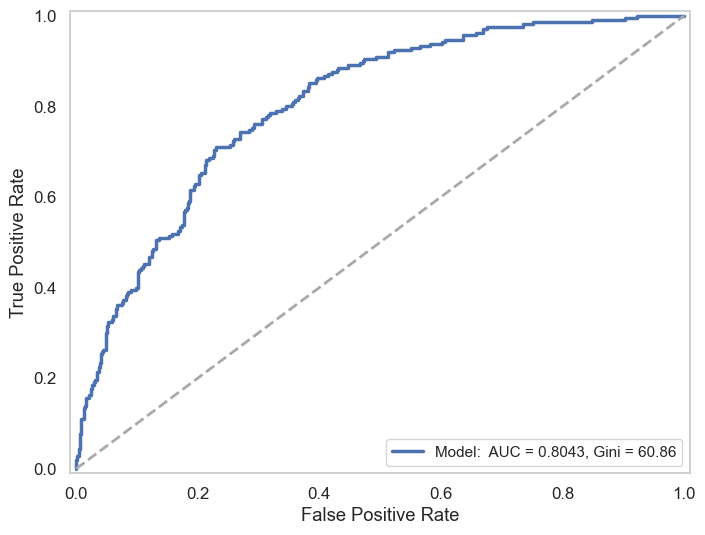

Test set


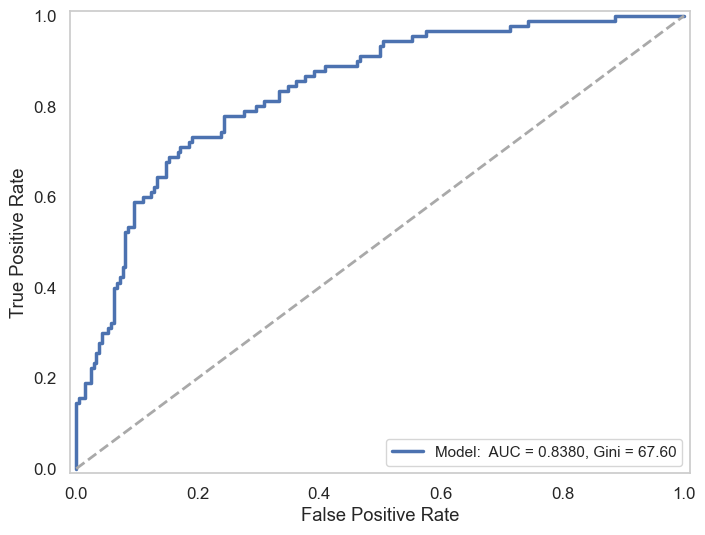

In [116]:
print('Training set')
roc_gini(y_train_1.values, y_pred_train_1)
    
print('Test set')
roc_gini(y_test_1.values, y_pred_test_1)

In [117]:
vif_1 = vif_calculation(X1)
vif_1

,Feature,VIF Factor
0,checking_status,1.135930
1,credit_history,1.103569
2,purpose,1.054139
3,credit_amount,1.159912
4,savings_status,1.074893
5,employment,1.116610
6,installment_commitment,1.068103
7,other_parties,1.041640
8,property_magnitude,1.189122
9,age,1.132394


In [118]:
summary_1 = summary_model(IV, vif_1, lr_1_summary)
summary_1.sort_values(by='feature_importance', ascending=False)

,Feature,iv,Predictive_Power,vif,coef,std err,z,p-value,[0.025,0.975],feature_importance
6,installment_commitment,0.025569,Weak,1.068103,2.2513,0.613,3.673,0.000,1.050,3.453,17.890178
13,marriage,0.044671,Weak,1.100819,1.4176,0.769,1.843,0.065,-0.090,2.925,11.265099
2,purpose,0.169195,Medium,1.054139,1.0696,0.235,4.550,0.000,0.609,1.530,8.499682
4,savings_status,0.196010,Medium,1.074893,1.0549,0.236,4.462,0.000,0.592,1.518,8.382867
3,credit_amount,0.093362,Weak,1.159912,1.0146,0.342,2.963,0.003,0.343,1.686,8.062619
12,foreign_worker,0.043877,Weak,1.038756,0.9999,0.517,1.934,0.053,-0.013,2.013,7.945804
10,other_payment_plans,0.057615,Weak,1.057689,0.7927,0.387,2.049,0.040,0.035,1.551,6.299269
1,credit_history,0.293234,Medium,1.103569,0.7726,0.180,4.297,0.000,0.420,1.125,6.139542
7,other_parties,0.032019,Weak,1.041640,0.7601,0.513,1.481,0.139,-0.246,1.766,6.040210
0,checking_status,0.666012,Suspicious,1.135930,0.7539,0.121,6.248,0.000,0.517,0.990,5.990941


In [119]:
X_train_1, X_test_1, y_train_1, y_test_1
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss='log')
clf.fit(X_train_1,y_train_1)
pred = clf.predict(X_test_1)

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [120]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test_1,pred))
print(classification_report(y_test_1,pred))

[[182  28]
 [ 29  61]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       210
           1       0.69      0.68      0.68        90

    accuracy                           0.81       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.81      0.81      0.81       300

